# Predição de Saída de Funcionários com Regressão Logística

## 📘 Dicionário de Dados

| Variável                          | Descrição                                                                     |
|----------------------------------|-------------------------------------------------------------------------------|
| **ID**                           | Matrícula do funcionário                                                      |
| **Funcionário_deixou_a_empresa** | Marcação se o funcionário deixou a empresa recentemente                      |
| **Idade**                        | Idade do funcionário                                                          |
| **Frequência de Viagens**        | Frequência de viagens a trabalho do funcionário                               |
| **Distância_do_trabalho**        | Distância em Km até o trabalho                                                |
| **Formação**                     | Nível de formação                                                             |
| **E-Sat**                       | Satisfação com o clima organizacional                                         |
| **Gênero**                      | Gênero do funcionário                                                         |
| **Estado_Civil**                | Estado civil do funcionário                                                   |
| **Salário**                     | Salário mensal                                                                |
| **Quant. de Empresas Trabalhadas** | Quantidade de empresas que o funcionário já trabalhou                         |
| **Faz_hora_extras**             | Se funcionário costuma fazer hora extra                                       |
| **Equilibrio_de_Vida**          | Nota que o funcionário deu para seu equilíbrio entre vida pessoal e profissional|
| **Tempo_de_empresa**            | Tempo em anos que o funcionário trabalha na empresa                           |

# 1) Importação dos dados e checagens iniciais 
(quantidade de linhas e colunas, quantidade de missings, proporção do target, medidas resumo, etc)

In [1]:
# Visualização e tratamento dos dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modelagem
from sklearn.linear_model import LogisticRegression

# Métricas
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from scipy import stats

In [2]:
df = pd.read_excel('rh.xlsx')
df.head()

,ID,Funcionário_deixou_a_empresa,Idade,Frequência de Viagens,Distância_do_trabalho,Formação,E-Sat,Gênero,Estado_Civil,Salário,Qte_Empresas_Trabalhadas,Faz_hora_extras?,Equilibrio_de_Vida,Tempo_de_empresa
0,1,Sim,41,Viaja raramente,1,Ensino Técnico,Médio,M,Solteiro,5993,8,Sim,Ruim,6
1,2,Não,49,Viaja frequentemente,8,Ensino Médio,Alto,H,Casado,5130,1,Não,Muito bom,10
2,3,Sim,37,Viaja raramente,2,Ensino Técnico,Muito Alto,H,Solteiro,2090,6,Sim,Muito bom,0
3,4,Não,33,Viaja frequentemente,3,Mestrado,Muito Alto,M,Casado,2909,1,Sim,Muito bom,8
4,5,Não,27,Viaja raramente,2,Ensino Médio,Baixo,H,Casado,3468,9,Não,Muito bom,2


In [3]:
# Exclusão de colunas que não serão utilizadas no modelo
df = df.drop(columns=['ID', 'Equilibrio_de_Vida', 'E-Sat', 'Estado_Civil', 'Frequência de Viagens'])

In [4]:
# Primeiras 5 linhas do DataFrame
df.head()

,Funcionário_deixou_a_empresa,Idade,Distância_do_trabalho,Formação,Gênero,Salário,Qte_Empresas_Trabalhadas,Faz_hora_extras?,Tempo_de_empresa
0,Sim,41,1,Ensino Técnico,M,5993,8,Sim,6
1,Não,49,8,Ensino Médio,H,5130,1,Não,10
2,Sim,37,2,Ensino Técnico,H,2090,6,Sim,0
3,Não,33,3,Mestrado,M,2909,1,Sim,8
4,Não,27,2,Ensino Médio,H,3468,9,Não,2


In [5]:
# Identificação das colunas categóricas
colunas_categoricas = [
    'Faz_hora_extras?',
    'Formação',
    'Gênero',
    'Funcionário_deixou_a_empresa'  # variável resposta
]

# Visualização do número de opções de cada variável categórica
df[colunas_categoricas].nunique()

Faz_hora_extras?                2
Formação                        5
Gênero                          2
Funcionário_deixou_a_empresa    2
dtype: int64

In [6]:
# Lista de opções de cada variável categórica
for coluna in colunas_categoricas:
    categorias = df[coluna].unique()
    print(f"{coluna} -> {categorias}")

Faz_hora_extras? -> ['Sim' 'Não']
Formação -> ['Ensino Técnico' 'Ensino Médio' 'Mestrado' 'Ensino Superior' 'Doutorado']
Gênero -> ['M' 'H']
Funcionário_deixou_a_empresa -> ['Sim' 'Não']


In [7]:
# Definição dos valores de cada variável categórica ordinal
formacao_ordinal = {
    'Ensino Técnico': 1,
    'Ensino Médio': 2,
    'Mestrado': 3,
    'Ensino Superior': 4,
    'Doutorado': 5
}

# Codificação ordinal
df['Formação'] = df['Formação'].map(formacao_ordinal)

# Definição dos valores das variáveis binárias
df['Funcionário_deixou_a_empresa'] = df['Funcionário_deixou_a_empresa'].map({'Sim': 1, 'Não': 0})
df['Faz_hora_extras?'] = df['Faz_hora_extras?'].map({'Sim': 1, 'Não': 0})
df['Gênero'] = df['Gênero'].map({'H': 1, 'M': 0})

In [8]:
# Visualização das 5 primeiras linhas do DataFrame
df.head()

,Funcionário_deixou_a_empresa,Idade,Distância_do_trabalho,Formação,Gênero,Salário,Qte_Empresas_Trabalhadas,Faz_hora_extras?,Tempo_de_empresa
0,1,41,1,1,0,5993,8,1,6
1,0,49,8,2,1,5130,1,0,10
2,1,37,2,1,1,2090,6,1,0
3,0,33,3,3,0,2909,1,1,8
4,0,27,2,2,1,3468,9,0,2


In [9]:
# Percentual dos funcionários que deixaram a empresa
df.Funcionário_deixou_a_empresa.mean() # 16% dos funcionários da base deixaram a empresa

0.16122448979591836

In [10]:
# Visualização do número de linhas (1470) e colunas (9)
df.shape

(1470, 9)

In [11]:
# Visualização das informações de cada variável
df.info() # Aparentemente, nenhum valor missing na base

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Funcionário_deixou_a_empresa  1470 non-null   int64
 1   Idade                         1470 non-null   int64
 2   Distância_do_trabalho         1470 non-null   int64
 3   Formação                      1470 non-null   int64
 4   Gênero                        1470 non-null   int64
 5   Salário                       1470 non-null   int64
 6   Qte_Empresas_Trabalhadas      1470 non-null   int64
 7   Faz_hora_extras?              1470 non-null   int64
 8   Tempo_de_empresa              1470 non-null   int64
dtypes: int64(9)
memory usage: 103.5 KB


In [12]:
# Valores estatísticos
df.describe()

,Funcionário_deixou_a_empresa,Idade,Distância_do_trabalho,Formação,Gênero,Salário,Qte_Empresas_Trabalhadas,Faz_hora_extras?,Tempo_de_empresa
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.161224,36.923810,9.192517,2.955102,0.600000,6502.931293,2.693197,0.282993,7.008163
std,0.367863,9.135373,8.106864,1.183917,0.490065,4707.956783,2.498009,0.450606,6.126525
min,0.000000,18.000000,1.000000,1.000000,0.000000,1009.000000,0.000000,0.000000,0.000000
25%,0.000000,30.000000,2.000000,2.000000,0.000000,2911.000000,1.000000,0.000000,3.000000
50%,0.000000,36.000000,7.000000,3.000000,1.000000,4919.000000,2.000000,0.000000,5.000000
75%,0.000000,43.000000,14.000000,4.000000,1.000000,8379.000000,4.000000,1.000000,9.000000
max,1.000000,60.000000,29.000000,5.000000,1.000000,19999.000000,9.000000,1.000000,40.000000


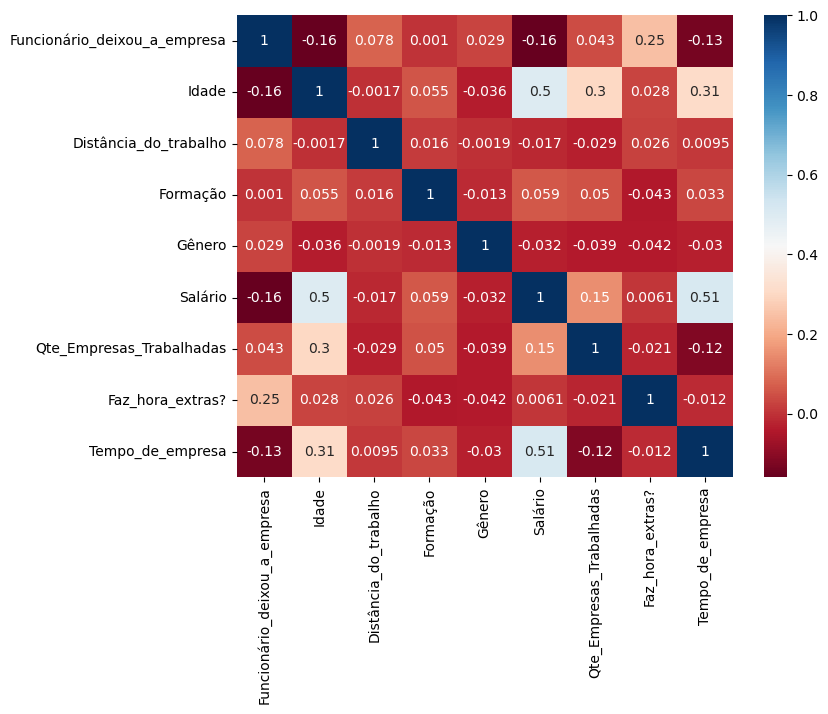

In [13]:
# Plotagem do gráfico de correlação
plt.figure(figsize=(8,6)) # Ajusta o tamanho da figura
sns.heatmap(df.corr(), cmap='RdBu', annot=True); # Troca a cor e coloca o valor da correlação dentro da matriz

#### Pouca correlação entre as variáveis. É provável que o modelo não sofra com problemas de multicolinearidade.

# 2) Ajuste do modelo de Regressão Logística

In [14]:
x = df.drop(['Funcionário_deixou_a_empresa'],axis = 1)
y = df['Funcionário_deixou_a_empresa']

In [15]:
modelo = LogisticRegression(fit_intercept=True,random_state=42,max_iter=500)
modelo.fit(x,y)

LogisticRegression(max_iter=500, random_state=42)

In [16]:
df_2 = df.copy()
df_2['Prob'] = modelo.predict_proba(x)[:,1]
df_2['Deixou_Empresa_Predito'] = modelo.predict(x) # Y_Predito

In [17]:
df_2.head()

,Funcionário_deixou_a_empresa,Idade,Distância_do_trabalho,Formação,Gênero,Salário,Qte_Empresas_Trabalhadas,Faz_hora_extras?,Tempo_de_empresa,Prob,Deixou_Empresa_Predito
0,1,41,1,1,0,5993,8,1,6,0.319518,0
1,0,49,8,2,1,5130,1,0,10,0.037371,0
2,1,37,2,1,1,2090,6,1,0,0.465581,0
3,0,33,3,3,0,2909,1,1,8,0.290661,0
4,0,27,2,2,1,3468,9,0,2,0.320878,0


# 3) Cálculo as métricas de performance

## 3.1) Matriz de Confusão

In [18]:
# Pacote que cria a matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [19]:
cm = confusion_matrix(df_2['Funcionário_deixou_a_empresa'], df_2['Deixou_Empresa_Predito'])

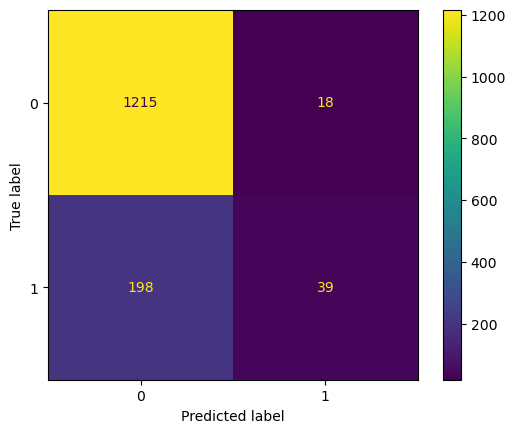

In [20]:
ConfusionMatrixDisplay(confusion_matrix=cm,).plot();

## 3.2) Plotagem da Curva ROC do modelo

In [21]:
fpr, tpr, thresholds = roc_curve(df_2['Funcionário_deixou_a_empresa'], df_2['Prob'])

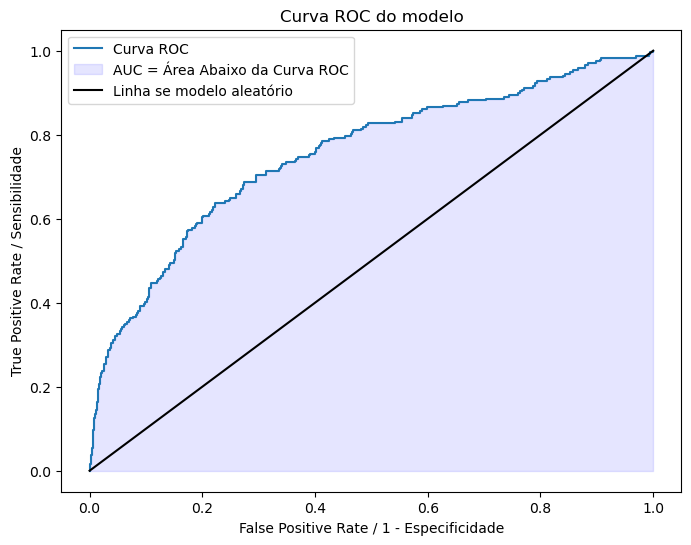

In [22]:
plt.figure(figsize=(8,6))

plt.plot(fpr,tpr, label='Curva ROC')
plt.fill_between(fpr,tpr,color='blue',alpha= 0.1,label = 'AUC = Área Abaixo da Curva ROC')
plt.plot(np.linspace(0,1,100),np.linspace(0,1,100),color='black',label='Linha se modelo aleatório')

plt.title("Curva ROC do modelo")
plt.ylabel('True Positive Rate / Sensibilidade')
plt.xlabel('False Positive Rate / 1 - Especificidade')
plt.legend();

## 3.3) Cálculo o AUC e o KS do modelo

In [23]:
# Calcula a área abaixo da curva ROC
print("O AUC é: ",roc_auc_score(df_2['Funcionário_deixou_a_empresa'], df_2['Prob']))

O AUC é:  0.752050673976203


Benchmark: Quanto mais próximo de 100% a AUC for,
melhor é o modelo. Modelos entre 50% e 60% são
considerados ruins (baixa discriminação).

In [24]:
# Prob (Y = 1) quando o Y Real for igual a 0
prob_y_real_0 = df_2.loc[df_2.Funcionário_deixou_a_empresa==0,"Prob"]

# Prob (Y = 1) quando o Y Real for igual a 1
prob_y_real_1 = df_2.loc[df_2.Funcionário_deixou_a_empresa==1,"Prob"]

In [25]:
print("O KS é: ",stats.ks_2samp(prob_y_real_0, prob_y_real_1).statistic)

O KS é:  0.41444660034699765


## 3.4) Precision, Sensibilidade/Recall, Especificidade e F1 Score: Interpretação os Resultados!

In [26]:
print(classification_report(df_2['Funcionário_deixou_a_empresa'], df_2['Deixou_Empresa_Predito']))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1233
           1       0.68      0.16      0.27       237

    accuracy                           0.85      1470
   macro avg       0.77      0.57      0.59      1470
weighted avg       0.83      0.85      0.81      1470



In [27]:
especificidade = cm[0,0]/(cm[0,0]+cm[0,1])
print('A especificidade é: ',especificidade)

A especificidade é:  0.9854014598540146


Para o corte padrão de probabilidade 0,5, interpretamos:

- **Precision:** 0,68 >> De todos os funcionários que o modelo previu como tendo saído, 68% realmente saíram da empresa.
    - Ou seja, quando o modelo diz que alguém vai sair, ele está certo em 68% dos casos.
- **Sensibilidade/Recall:** 0,16 >> De todos os funcionários que realmente saíram, o modelo só conseguiu identificar 16% deles.
    - Ou seja, o modelo está "deixando passar" a maior parte dos funcionários que de fato saíram — só pega 1 em cada 6.
- **Especificidade:** 0.99 >> De todos os colaboradores que **não** deixaram a empresa, o modelo classificou como não deixaram a empresa 99%.

### Qual a métrica prioritária para o problema? Ou seja, queremos diminuir falsos positivos ou falsos negativos? Além disso, qual o corte de probabilidade que minimiza esse erro?

O threshold padrão (0.5) está muito alto para o seu caso. Como o modelo apresenta uma boa performance (AUC = 0.75), reduzir o corte pode aumentar o recall e capturar mais funcionários com risco real de saída.

Ao aplicar esse modelo para prever se um funcionário sairá da empresa, precisamos refletir sobre o tipo de erro mais crítico:

- Se quisermos **evitar perder funcionários que realmente sairão**, o foco deve ser em **reduzir os falsos negativos** (classificar como “vai ficar” quem na verdade vai sair) 
Nesse caso, a **métrica prioritária é o recall**

- Por outro lado, se for mais grave **acionar ações para quem não sairia** (falsos positivos), deveríamos focar em aumentar a **precisão (precision)**

Neste cenário, como o objetivo é **antecipar a saída dos funcionários para reter talentos**, geralmente priorizamos **diminuir falsos negativos**, ou seja, **aumentar o recall**.

### Cálculo com o Threshold 0.25

In [28]:
df_2['Deixou_Empresa_Predito'] = np.where(df_2['Prob']>0.25,1,0)

In [29]:
cm2 = confusion_matrix(df_2['Funcionário_deixou_a_empresa'], df_2['Deixou_Empresa_Predito'])

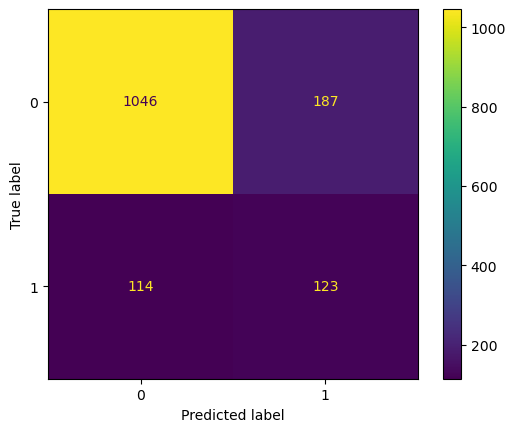

In [30]:
# Matriz Com Corte > 0.25 (Após a mudança para melhorar a sensibilidade)
ConfusionMatrixDisplay(confusion_matrix=cm2,).plot();

#### A quantidade de falsos negativos diminuiu

In [31]:
print(classification_report(df_2['Funcionário_deixou_a_empresa'], df_2['Deixou_Empresa_Predito']))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87      1233
           1       0.40      0.52      0.45       237

    accuracy                           0.80      1470
   macro avg       0.65      0.68      0.66      1470
weighted avg       0.82      0.80      0.81      1470



### O que mudou em relação ao corte padrão (0.5)

| Métrica              | Threshold = 0.5 | Threshold = 0.25 | Interpretação                                                |
|----------------------|----------------|------------------|---------------------------------------------------------------|
| **Recall (classe 1)**    | 0.16           | 0.52             | Captura muito mais quem realmente vai sair                 |
| **Precision (classe 1)** | 0.68           | 0.40             | Mais falsos positivos, mas ainda aceitável                 |
| **Acurácia**             | 0.85           | 0.80             | Caiu um pouco, mas esperado e aceitável                    |
| **F1-Score (classe 1)**  | 0.27           | 0.45             | Melhor equilíbrio entre precisão e sensibilidade (recall)  |

- Com threshold = 0.25, o modelo está mais sensível — ele identifica mais pessoas que sairão, mesmo que com mais falsos positivos

- Isso é bom se o objetivo da empresa é não deixar ninguém ir embora sem tentar reter antes

- Ou seja, melhor pecar por excesso (falsos positivos) do que deixar passar quem realmente vai sair (falsos negativos)


In [32]:
# 0. Recriar a coluna ID (começando em 1)
df_2['ID'] = range(1, len(df_2) + 1)

# 1. Filtrar apenas os funcionários que ainda não saíram
df_ativos = df_2[df_2['Funcionário_deixou_a_empresa'] == 0]

# 2. Ordenar pela probabilidade de saída (decrescente)
df_ativos_ordenado = df_ativos.sort_values(by='Prob', ascending=False)

# 3. Visualizar os top funcionários em risco
df_ativos_ordenado.head(10)

,Funcionário_deixou_a_empresa,Idade,Distância_do_trabalho,Formação,Gênero,Salário,Qte_Empresas_Trabalhadas,Faz_hora_extras?,Tempo_de_empresa,Prob,Deixou_Empresa_Predito,ID
54,0,26,23,4,0,4157,7,1,2,0.696612,1,55
909,0,19,25,4,0,2994,1,1,1,0.664024,1,910
354,0,30,25,1,0,4736,7,1,2,0.647243,1,355
1137,0,22,26,1,0,2814,1,1,4,0.617221,1,1138
17,0,22,16,1,1,2935,1,1,1,0.598627,1,18
1413,0,25,2,2,1,3977,6,1,2,0.589179,1,1414
180,0,31,12,2,0,3929,8,1,4,0.586285,1,181
474,0,24,23,4,1,2725,1,1,6,0.583544,1,475
1422,0,35,11,3,1,2660,7,1,2,0.557051,1,1423
1436,0,21,5,2,1,2380,1,1,2,0.548033,1,1437


In [34]:
# Recriar coluna ID (se já não existir)
df_2['ID'] = range(1, len(df_2) + 1)

# Filtrar funcionários que ainda não saíram
df_ativos = df_2[df_2['Funcionário_deixou_a_empresa'] == 0]

# Ordenar por probabilidade de saída (risco decrescente)
df_ativos_ordenado = df_ativos.sort_values(by='Prob', ascending=False)

# Criar faixa de risco para facilitar análise
df_ativos_ordenado['Risco'] = pd.cut(df_ativos_ordenado['Prob'],
                                     bins=[0, 0.3, 0.7, 1],
                                     labels=['Baixo', 'Médio', 'Alto'])

# Exibir os 10 funcionários ativos com maior risco de saída
df_ativos_ordenado[['ID', 'Prob', 'Risco']].head(10)

# Visualizar os top funcionários em risco
df_ativos_ordenado.head(10)

# Exportar resultado final
df_ativos_ordenado.to_excel('funcionarios_em_risco.xlsx', index=False)